# ORB(ORB: an dfficient alternative to SIFT or SURF)  
### FAST detector + Oriented BRIEF

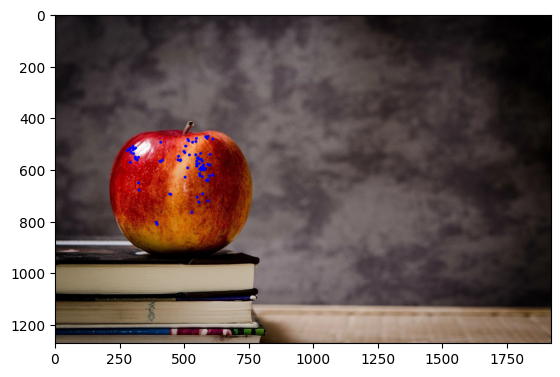

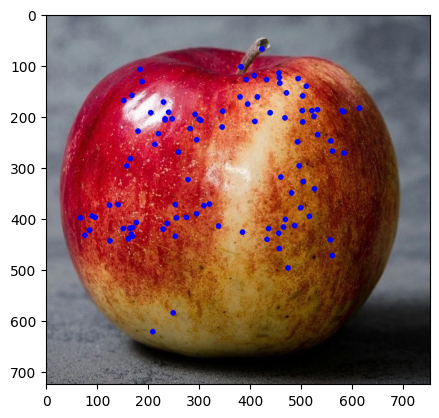

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread("../chapter_2/Chapter_2.0/data/apple_books.jpg")
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
target = cv2.imread("../chapter_2/Chapter_2.0/data/apple.jpg")

orb = cv2.ORB_create(
    nfeatures=40000,
    scaleFactor=1.2,
    nlevels=8,
    edgeThreshold=31,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=31,
    fastThreshold=20,
)

kp1, des1 = orb.detectAndCompute(gray, None)
kp2, des2 = orb.detectAndCompute(target, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

for i in matches[:100]:
    idx = i.queryIdx
    x1, y1 = kp1[idx].pt
    cv2.circle(src, (int(x1), int(y1)), 3, (255,0,0), 3)

    x2, y2 = kp2[idx].pt
    cv2.circle(target, (int(x2), int(y2)), 3, (255,0,0), 3)

plt.imshow(src[:, :, ::-1])
plt.show()

plt.imshow(target[:, :, ::-1])
plt.show()